In [102]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
covid = pd.read_csv('caso.csv')

In [104]:
covid.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-05-19,SE,NaN,state,3967,63,56,True,2298696.0,28.0,172.57610,0.0159
1,2020-05-18,SE,NaN,state,3566,59,55,False,2298696.0,28.0,155.13143,0.0165
2,2020-05-17,SE,NaN,state,3343,57,54,False,2298696.0,28.0,145.43028,0.0171
3,2020-05-16,SE,NaN,state,3135,53,53,False,2298696.0,28.0,136.38167,0.0169
4,2020-05-15,SE,NaN,state,2868,50,52,False,2298696.0,28.0,124.76639,0.0174


In [105]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98692 entries, 0 to 98691
Data columns (total 12 columns):
date                              98692 non-null object
state                             98692 non-null object
city                              96898 non-null object
place_type                        98692 non-null object
confirmed                         98692 non-null int64
deaths                            98692 non-null int64
order_for_place                   98692 non-null int64
is_last                           98692 non-null bool
estimated_population_2019         97761 non-null float64
city_ibge_code                    97761 non-null float64
confirmed_per_100k_inhabitants    95594 non-null float64
death_rate                        98692 non-null float64
dtypes: bool(1), float64(4), int64(3), object(4)
memory usage: 8.4+ MB


In [106]:
covid.describe()

,confirmed,deaths,order_for_place,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
count,98692.000000,98692.000000,98692.000000,9.776100e+04,9.776100e+04,95594.000000,98692.000000
mean,90.409618,6.010072,19.641329,2.508066e+05,3.112280e+06,37.236883,0.073598
std,1067.980605,85.668370,14.350878,1.788209e+06,1.050634e+06,77.892552,0.193556
min,0.000000,0.000000,1.000000,1.112000e+03,1.100000e+01,0.002180,0.000000
25%,1.000000,0.000000,8.000000,1.290800e+04,2.407005e+06,5.903710,0.000000
50%,3.000000,0.000000,17.000000,2.789000e+04,3.147303e+06,14.259230,0.000000
75%,12.000000,1.000000,29.000000,7.164800e+04,4.103701e+06,36.934440,0.047600
max,69859.000000,5363.000000,84.000000,4.591905e+07,5.300108e+06,2314.600500,1.000000


In [107]:
#Seleciona as colunas data, estado e casos confirmados
casos_confirmados = covid[['date','state','confirmed']]
casos_confirmados.head()

,date,state,confirmed
0,2020-05-19,SE,3967
1,2020-05-18,SE,3566
2,2020-05-17,SE,3343
3,2020-05-16,SE,3135
4,2020-05-15,SE,2868


In [108]:
# Convertendo a coluna data de object para datetime  
casos_confirmados['date'] = pd.to_datetime(casos_confirmados['date'], format = '%Y-%m-%d')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [109]:
casos_confirmados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98692 entries, 0 to 98691
Data columns (total 3 columns):
date         98692 non-null datetime64[ns]
state        98692 non-null object
confirmed    98692 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.3+ MB


In [113]:
#Transforma a data em index

casos_confirmados = casos_confirmados.set_index('date')
casos_confirmados.head()

,state,confirmed
date,,
2020-05-19,SE,3967
2020-05-18,SE,3566
2020-05-17,SE,3343
2020-05-16,SE,3135
2020-05-15,SE,2868


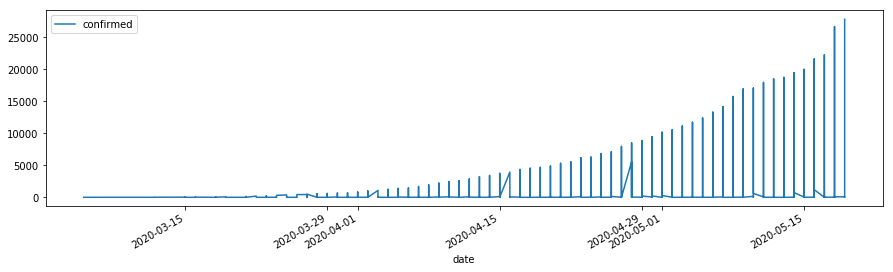

In [139]:
casos_confirmados.loc[casos_confirmados['state'] == 'RJ'].plot(figsize=(15, 4))